   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
In

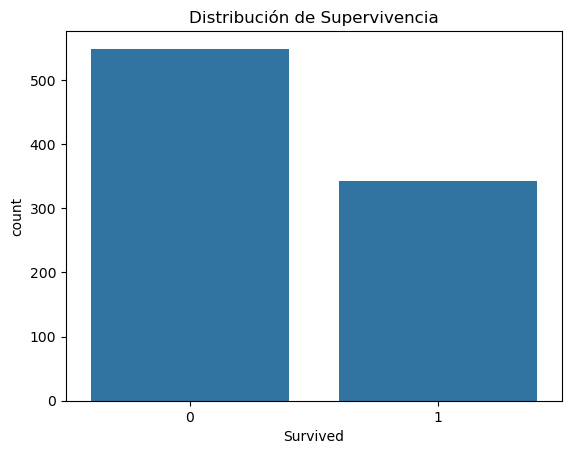

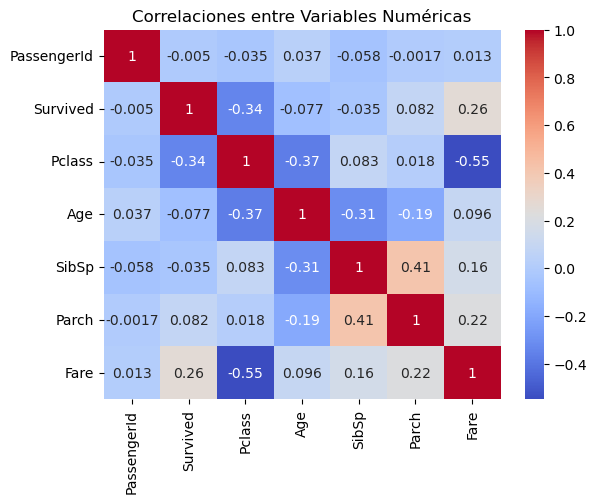

In [34]:
# Modelo seleccionado es : Regresión Logística


# 1. Análisis exploratorio de los datos (EDA)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
data = pd.read_csv("C:/Users/Javier Alexander Gar/Downloads/Mosquera tareas/ANÁLISIS DE DATOS/Tarea5/Anexo 6 - Dataset Titanic/Titanic-Dataset.csv")

# Verificar las primeras filas y las columnas
print(data.head())
print(data.columns)

# Resumen de estadísticas descriptivas
print(data.describe())

# Comprobar valores nulos
print(data.isnull().sum())

# Visualización de la distribución de la variable 'Survived'
sns.countplot(x='Survived', data=data)
plt.title('Distribución de Supervivencia')
plt.show()

# Seleccionar solo las columnas numéricas para la correlación
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Correlaciones entre las variables numéricas
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlaciones entre Variables Numéricas')
plt.show()


In [27]:
# Codificar la columna 'Embarked'
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Verificar las nuevas columnas
print(data.columns)



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [40]:
# 2. Preprocesamiento de los datos

# Rellenar los valores faltantes en 'Age' con la mediana
data['Age'] = data['Age'].fillna(data['Age'].median())

# Rellenar los valores faltantes en 'Embarked' con la moda
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Verificar que no hay valores nulos en las columnas procesadas
print(data.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [46]:
# 3. Selección de características más relevantes para entrenar el modelo
# Seleccionar características
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']




In [47]:
# 4. Dividir el dataset en Train y Test
from sklearn.model_selection import train_test_split

# Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# 5. Entrenar el modelo (Regresión Logística)
from sklearn.linear_model import LogisticRegression

# Inicializar y entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [68]:
# 6. Evaluar el desempeño del modelo en el conjunto de Test
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Realizar predicciones sobre el conjunto de test
y_pred = model.predict(X_test)

# Evaluar el desempeño del modelo: precisión y reporte de clasificación
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión: {accuracy:.2f}")

# Generar el reporte de clasificación completo (precision, recall, f1-score)
report = classification_report(y_test, y_pred)
print("\nReporte de Clasificación:")
print(report)




Precisión: 0.81

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



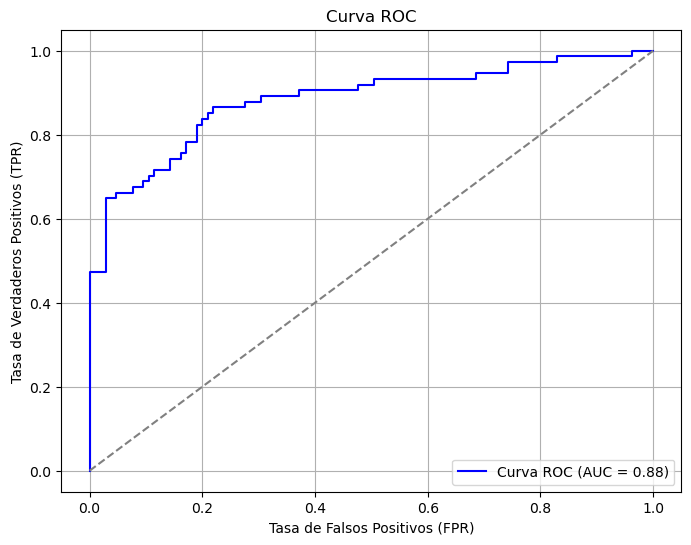

In [69]:
# 7. Realizar las diferentes gráficas para visualizar los resultados del modelo
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular las probabilidades de predicción para la clase positiva
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular los valores de FPR, TPR y el umbral
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


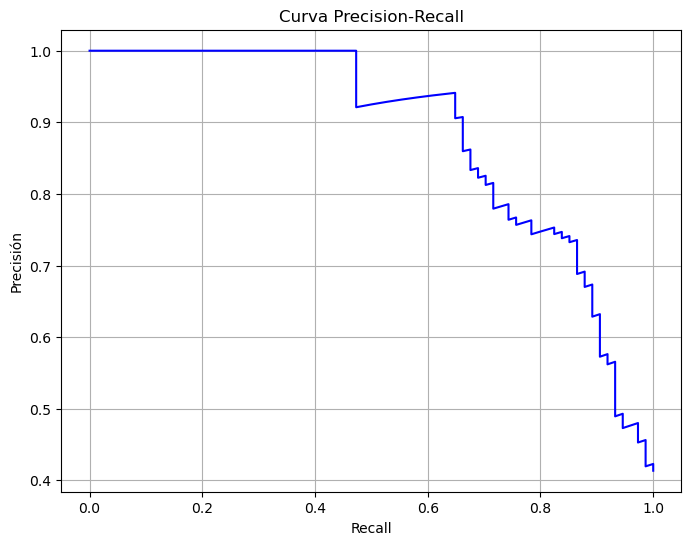

In [56]:
from sklearn.metrics import precision_recall_curve

# Calcular los valores de precisión y recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_prob)

# Graficar la curva Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b')
plt.title('Curva Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()


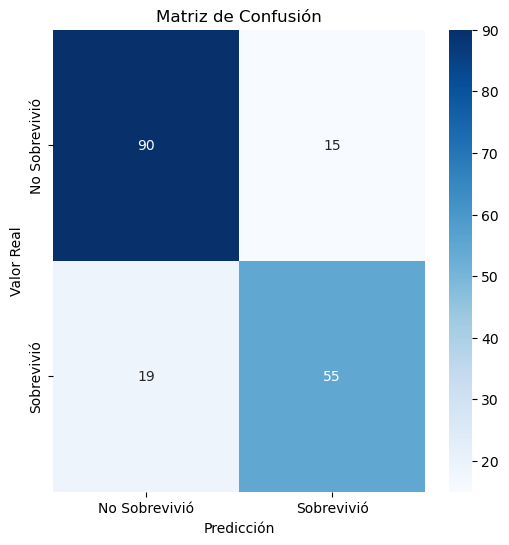

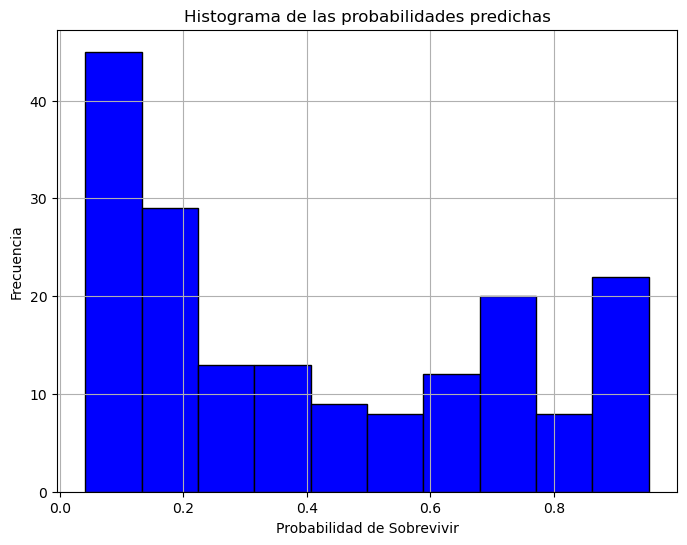

In [58]:
plt.figure(figsize=(8, 6))
plt.hist(y_prob, bins=10, color='b', edgecolor='black')
plt.title('Histograma de las probabilidades predichas')
plt.xlabel('Probabilidad de Sobrevivir')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


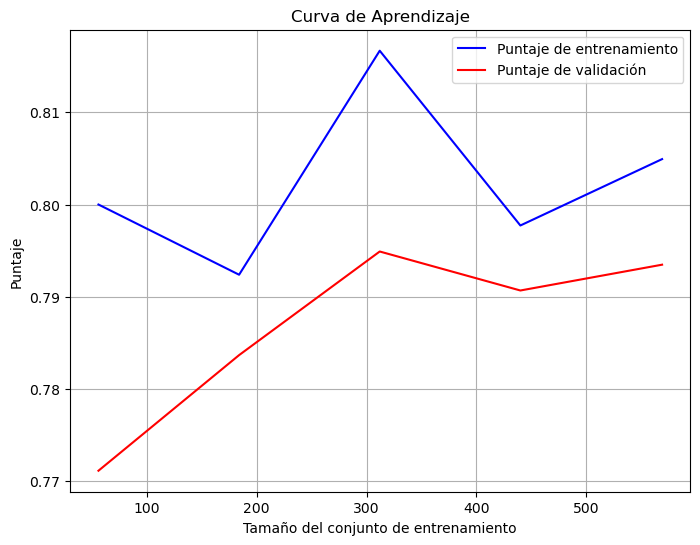

In [59]:
from sklearn.model_selection import learning_curve

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

# Graficar la curva de aprendizaje
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Puntaje de entrenamiento', color='b')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Puntaje de validación', color='r')
plt.title('Curva de Aprendizaje')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Puntaje')
plt.legend()
plt.grid(True)
plt.show()


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Realizar las predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mostrar los resultados
print(f"Precisión: {accuracy:.2f}")
print(f"Precisión (Precision): {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Precisión: 0.81
Precisión (Precision): 0.79
Recall: 0.74
F1-score: 0.76


In [62]:
# Obtener los coeficientes
coeficientes = model.coef_[0]
intercepto = model.intercept_[0]

# Mostrar los coeficientes
print("Intercepto:", intercepto)
print("Coeficientes de las características:", coeficientes)

# Mostrar los coeficientes con los nombres de las características
import pandas as pd

# Asegúrate de que 'X_train' sea el dataframe con los nombres de las columnas
coef_df = pd.DataFrame(coeficientes, index=X_train.columns, columns=['Coeficiente'])
coef_df['Intercepto'] = intercepto

print(coef_df)


Intercepto: 4.534792321415791
Coeficientes de las características: [-9.38044694e-01 -3.05644674e-02 -2.95262089e-01 -1.08301595e-01
  2.57945505e-03 -2.59107623e+00 -1.12727767e-01 -4.00203585e-01]
            Coeficiente  Intercepto
Pclass        -0.938045    4.534792
Age           -0.030564    4.534792
SibSp         -0.295262    4.534792
Parch         -0.108302    4.534792
Fare           0.002579    4.534792
Sex_male      -2.591076    4.534792
Embarked_Q    -0.112728    4.534792
Embarked_S    -0.400204    4.534792
